In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import itertools
import numpy as np


In [19]:
# Best: df = pd.read_csv('data/oselm/0.001_0.0001_34_20_square.csv')
# Compare square and sin.

# High peak: df = pd.read_csv('data/oselm/0.001_0.001_34_20_square.csv')
# Sin and square work better
# CBF does not work

# df = pd.read_csv('data/oselm/0.001_0.001_30_20_square.csv')
# Square works, but sin doesn't
# CBF converges to 0. 

#- ---------------
# OESLM:
#lr_pres =  [1e-3, 1e-4]
#lr_posts =  [1e-3, 1e-4]
#z0s = [30, 34, 38]
#v0s = [20]
#funcs = [sin, square]

# SGD
# lr =  [1e-2, 1e-3, 1e-4, 1e-5]
# z0s = [30, 34, 38]
# v0s = [20]
# funcs = [sin, square]

# ELM

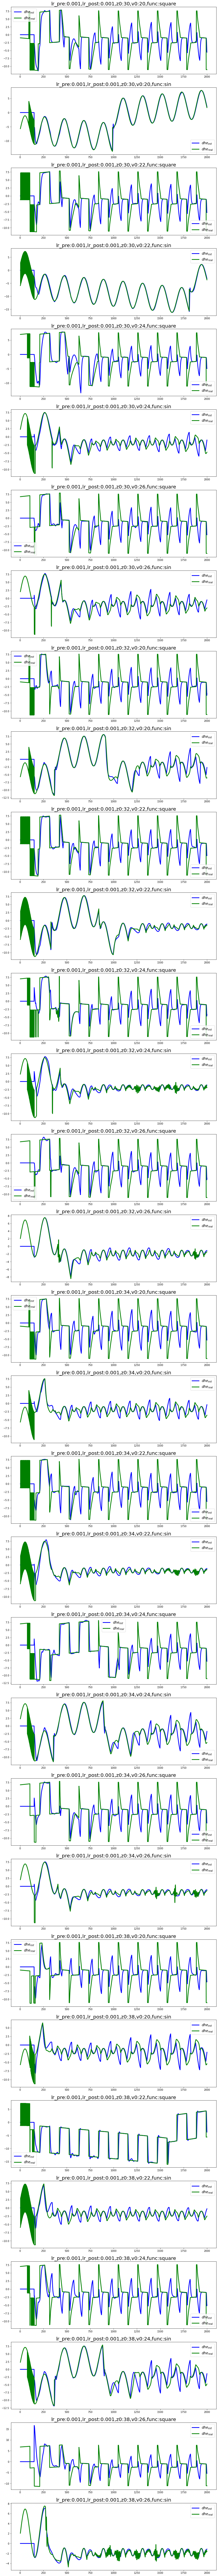

In [32]:
lr_pres =  [1e-3] #[1e-2, 1e-3, 1e-4, 1e-5]
lr_posts =  [1e-3]
z0s = [30,32,34,38]  #[30, 34, 38]
v0s = [20,22,24,26]
funcs = ["square", "sin"] 

cases = len(list(itertools.product(lr_pres, lr_posts, z0s, v0s, funcs)))
f, ax = plt.subplots(cases, 1, figsize = (15,cases*6))

i = 0
data_dir = '../data/elm'
for lr_pre, lr_post, z0, v0, func in itertools.product(lr_pres, lr_posts, z0s, v0s, funcs):
    fn = "lr_pre_{}_lr_post_{}_z0_{}_v0_{}_func_{}.csv".format(lr_pre, lr_post, z0, v0, func)
    path = os.path.join(data_dir, fn)
    df = pd.read_csv(path)
    
    ax[i].plot(df['dhe'][3:], linewidth=3, color = 'blue')
    ax[i].plot(df['dhe_real'][3:], linewidth=3, color = 'green')
    ax[i].legend(['$dhe_{est}$','$dhe_{real}$'], fontsize = 14)
    
    ax[i].set_title("lr_pre:{},lr_post:{},z0:{},v0:{},func:{}".format(lr_pre, lr_post, z0, v0, func), fontsize = 20)
    i=i+1

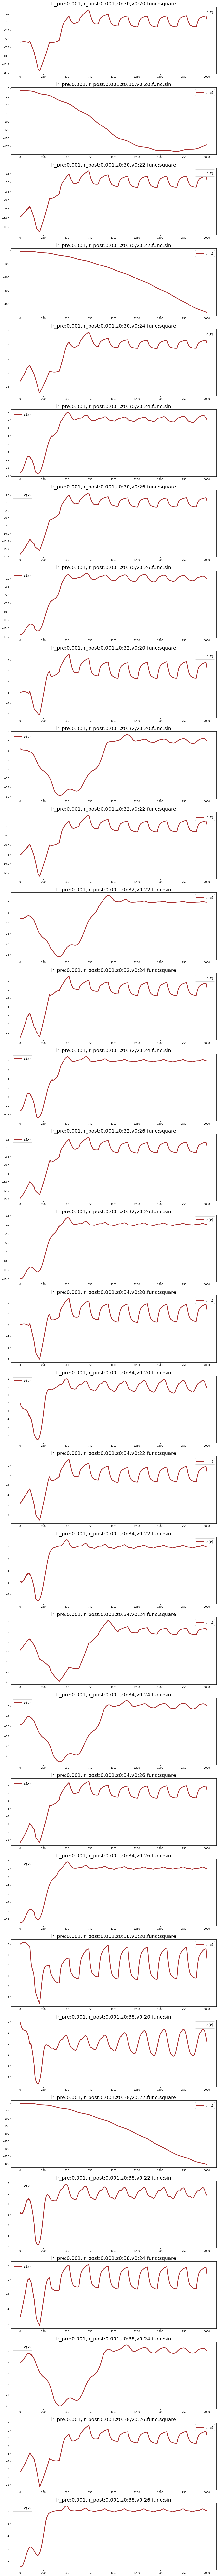

In [26]:
i = 0
f, ax = plt.subplots(cases, 1, figsize = (15,cases*6))

for lr, z0, v0, func in itertools.product(lr_pres, lr_posts, z0s, v0s, funcs):
    fn = "lr_pre_{}_lr_post_{}_z0_{}_v0_{}_func_{}.csv".format(lr_pre, lr_post, z0, v0, func)
    path = os.path.join(data_dir, fn)
    df = pd.read_csv(path)
    
    ax[i].plot(df['h'][3:], linewidth=3, color = 'brown')
    ax[i].legend(['$h(x)$'], fontsize = 14)
    
    ax[i].set_title("lr_pre:{},lr_post:{},z0:{},v0:{},func:{}".format(lr_pre, lr_post, z0, v0, func), fontsize = 20)
    i=i+1

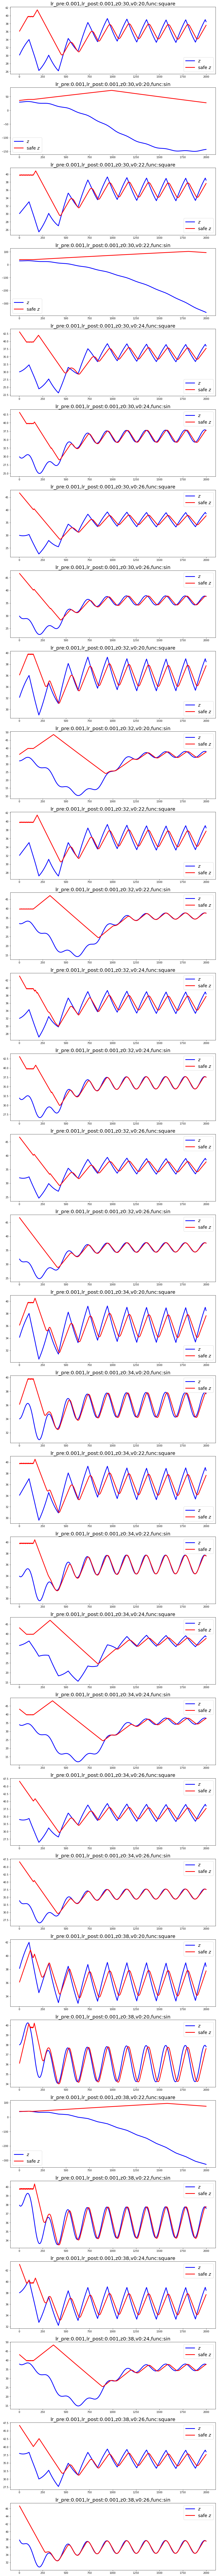

In [27]:
i = 0
f, ax = plt.subplots(cases, 1, figsize = (15,cases*6))

for lr, z0, v0, func in itertools.product(lr_pres, lr_posts, z0s, v0s, funcs):
    fn = "lr_pre_{}_lr_post_{}_z0_{}_v0_{}_func_{}.csv".format(lr_pre, lr_post, z0, v0, func)
    path = os.path.join(data_dir, fn)
    df = pd.read_csv(path)
    
    ax[i].plot(df['z'][3:], linewidth=3, color = 'blue')
    v = df['v'][3:]
    Th = 1.8
    ax[i].plot(Th*v, linewidth=3, color = 'red')
    ax[i].legend(['$z$', 'safe $z$'], fontsize = 18)
    
    ax[i].set_title("lr_pre:{},lr_post:{},z0:{},v0:{},func:{}".format(lr_pre, lr_post, z0, v0, func), fontsize = 20)
    i=i+1
    
    

Euclidean Error for 0.05: 115.44536552746008 
Euclidean Error for 0.001: 133.59515276909426 
Euclidean Error for 0.005: 272.8982877998021 


(0.0, 1000.0)

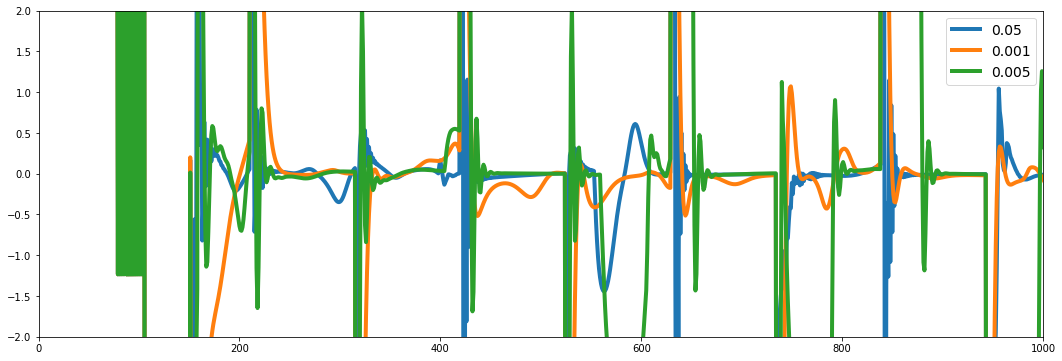

In [66]:
lr_pres =   [5e-3]  #[1e-2, 1e-3]
lr_posts =  [5e-2, 1e-3, 5e-3]#, 1e-3, 5e-3]  #[1e-2]
z0s = [30]#[30,32,34,38]  #[30, 34, 38]
v0s = [24]#[20,22,24,26]
funcs = ["square"]#, "sin"] 

cases = len(list(itertools.product(lr_pres, lr_posts, z0s, v0s, funcs)))
f, ax = plt.subplots(1, 1, figsize = (18,6))


data_dir = '../data/elm'
for lr_pre,lr_post, z0, v0, func in itertools.product(lr_pres, lr_posts, z0s, v0s, funcs):
    fn = "lr_pre_{}_lr_post_{}_z0_{}_v0_{}_func_{}.csv".format(lr_pre, lr_post, z0, v0, func)
    path = os.path.join(data_dir, fn)
    df = pd.read_csv(path)
    
    ax.plot(df['dhe_real'][3:] - df['dhe'][3:], linewidth=4)
    print("Euclidean Error for {}: {} ".format(lr_post, np.linalg.norm(df['dhe_real'][3:] - df['dhe'][3:])))
ax.legend(lr_posts, fontsize = 14)
ax.set_ylim([-2,2])
ax.set_xlim([0,1000])

# SGD

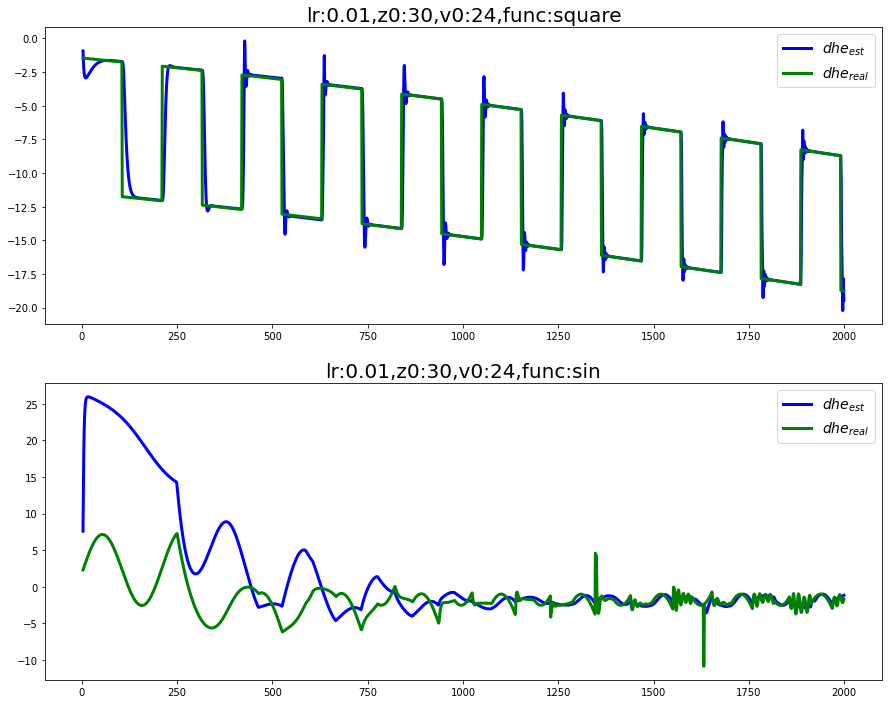

In [69]:
lrs =  [1e-2] #[1e-2, 1e-3, 1e-4, 1e-5]
z0s = [30]  #[30, 34, 38]
v0s = [24]
funcs = ["square", "sin"] 

cases = len(list(itertools.product(lrs, z0s, v0s, funcs)))
f, ax = plt.subplots(cases, 1, figsize = (15,cases*6))

i = 0
data_dir = '../data/sgd'
for lr, z0, v0, func in itertools.product(lrs, z0s, v0s, funcs):
    fn = "lr_{}_z0_{}_v0_{}_func_{}.csv".format(lr, z0, v0, func)
    path = os.path.join(data_dir, fn)
    df = pd.read_csv(path)
    
    ax[i].plot(df['dhe'][3:], linewidth=3, color = 'blue')
    ax[i].plot(df['dhe_real'][3:], linewidth=3, color = 'green')
    ax[i].legend(['$dhe_{est}$','$dhe_{real}$'], fontsize = 14)
    
    ax[i].set_title("lr:{},z0:{},v0:{},func:{}".format(lr, z0, v0, func), fontsize = 20)
    i=i+1

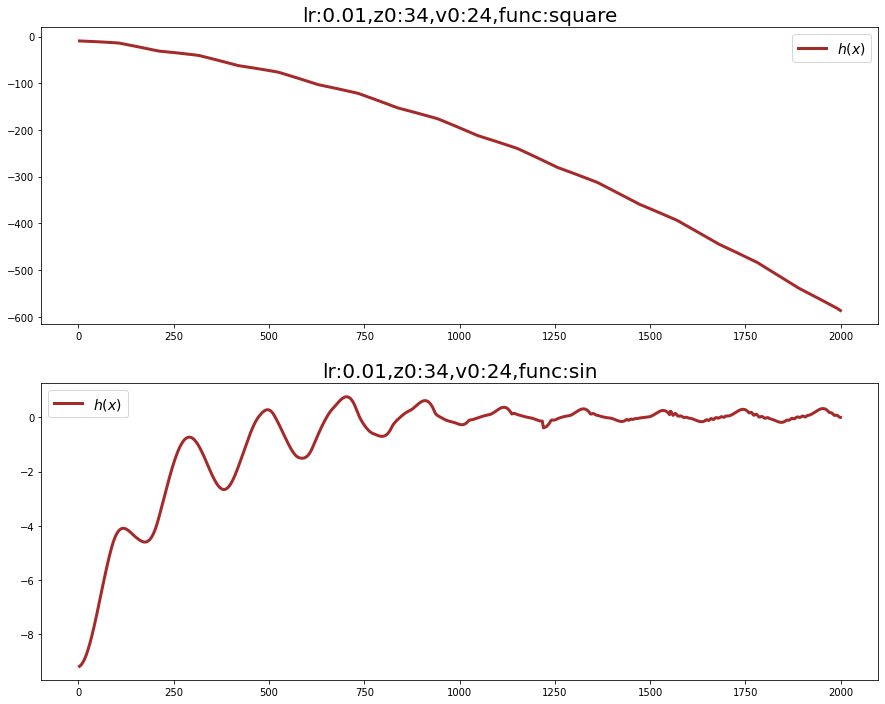

In [58]:
i = 0
f, ax = plt.subplots(cases, 1, figsize = (15,cases*6))

for lr, z0, v0, func in itertools.product(lrs, z0s, v0s, funcs):
    fn = "lr_{}_z0_{}_v0_{}_func_{}.csv".format(lr, z0, v0, func)
    path = os.path.join(data_dir, fn)
    df = pd.read_csv(path)
    
    ax[i].plot(df['h'][3:], linewidth=3, color = 'brown')
    ax[i].legend(['$h(x)$'], fontsize = 14)
    
    ax[i].set_title("lr:{},z0:{},v0:{},func:{}".format(lr, z0, v0, func), fontsize = 20)
    i=i+1

Text(0.5, 1.0, '$\\widetilde{\\dot{h}}_{est}$ vs $\\widetilde{\\dot{h}}_{real}$')

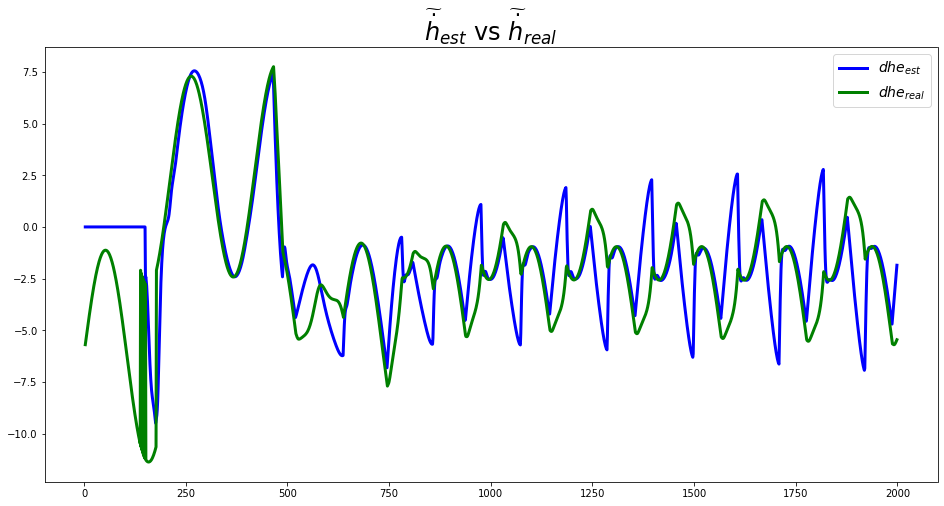

In [14]:

lr = 1e-4 #[1e-2, 1e-3, 1e-4, 1e-5]
lr_pre = 1e-3
lr_post = 1e-3
z0 = 30 #[30, 34, 38]
v0 = 20
func = 'sin'

data_dir = '../data/oselm'
#fn_sgd = "lr_{}_z0_{}_v0_{}_func_{}.csv".format(lr, z0, v0, func)
fn_elm = "lr_pre_{}_lr_post_{}_z0_{}_v0_{}_func_{}.csv".format(lr_pre, lr_post, z0, v0, func)
path = os.path.join(data_dir, fn_elm)
df = pd.read_csv(path)


f, ax = plt.subplots(figsize = (16,8))
ax.plot(df['dhe'][3:], linewidth=3, color = 'blue')
ax.plot(df['dhe_real'][3:], linewidth=3, color = 'green')
ax.legend(['$dhe_{est}$','$dhe_{real}$'], fontsize = 14)
ax.set_title('$\widetilde{\dot{h}}_{est}$ vs $\widetilde{\dot{h}}_{real}$', fontsize = 24)
#ax.set_ylim([-100,10])

Text(0.5, 1.0, 'CBF ($h(x)$)')

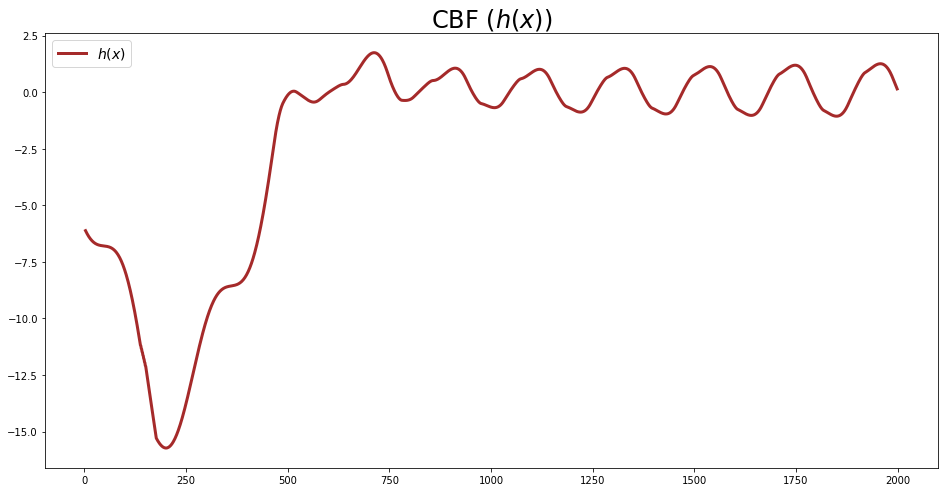

In [15]:
f, ax = plt.subplots(figsize = (16,8))
ax.plot(df['h'][3:], linewidth=3, color = 'brown')
ax.legend(['$h(x)$'], fontsize = 14)
ax.set_title('CBF ($h(x)$)', fontsize = 24)
#ax.set_ylim([-10,10])

Text(0.5, 1.0, 'Control input')

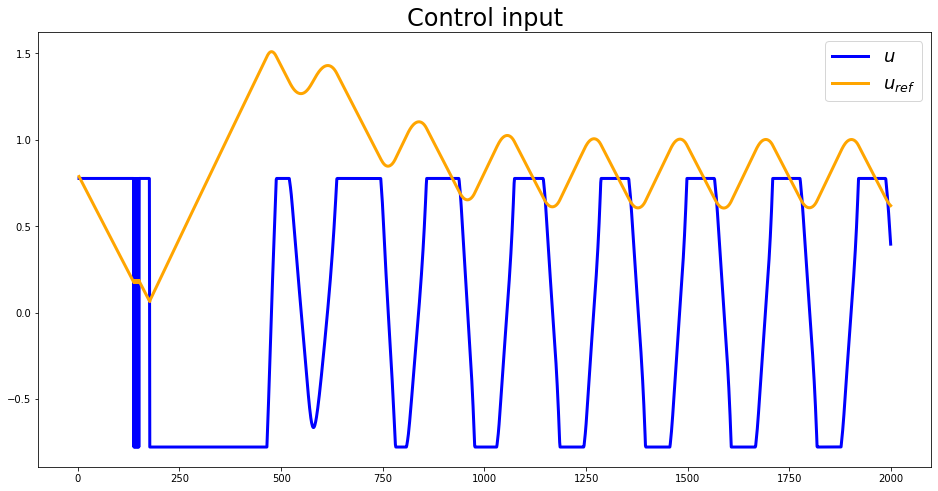

In [16]:
f, ax = plt.subplots(figsize = (16,8))
ax.plot(df['u'][3:], linewidth=3, color = 'blue')
ax.plot(df['u_ref'][3:], linewidth=3, color = 'orange')
ax.legend(['$u$', '$u_{ref}$'], fontsize = 18)
ax.set_title('Control input', fontsize = 24)

Text(0.5, 1.0, 'Distance')

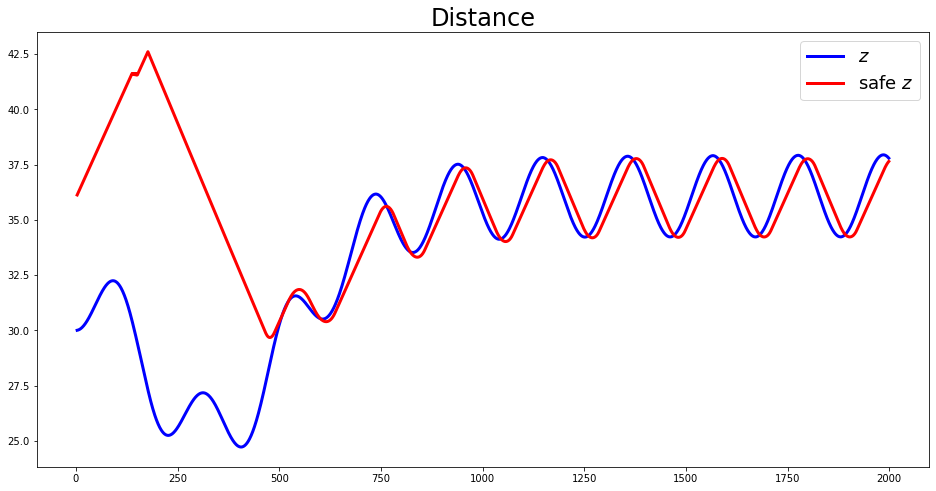

In [17]:
f, ax = plt.subplots(figsize = (16,8))
ax.plot(df['z'][3:], linewidth=3, color = 'blue')
v = df['v'][3:]
Th = 1.8
ax.plot(Th*v, linewidth=3, color = 'red')
ax.legend(['$z$', 'safe $z$'], fontsize = 18)
ax.set_title('Distance', fontsize = 24)

Text(0.5, 1.0, 'Velocity')

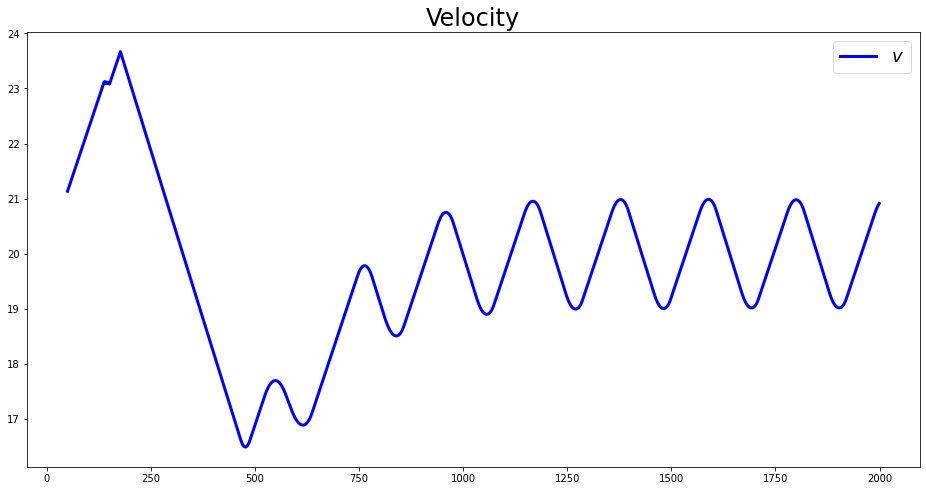

In [18]:
f, ax = plt.subplots(figsize = (16,8))
ax.plot(df['v'][50:], linewidth=3, color = 'blue')
ax.legend(['$v$'], fontsize = 18)
ax.set_title('Velocity', fontsize = 24)